In [1]:
%matplotlib inline


# Filling the area between lines

This example shows how to use `~.axes.Axes.fill_between` to color the area
between two lines.


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic usage
The parameters *y1* and *y2* can be scalars, indicating a horizontal
boundary at the given y-values. If only *y1* is given, *y2* defaults to 0.



In [73]:
# Read wealth
wealth = pd.read_pickle("wealth.pickle")
print(wealth.iloc[range(196,204)].to_markdown())

|   Step |   Wealth |
|-------:|---------:|
|      0 |  0       |
|      0 |  0       |
|      0 |  0       |
|      0 |  0       |
|      1 |  7.89338 |
|      1 |  7.50838 |
|      1 |  2.00948 |
|      1 |  8.74963 |


In [78]:
# Define functions to calculate percentiles
def q1(x):
    return x.quantile(0.01)

def q5(x):
    return x.quantile(0.05)

def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

def q95(x):
    return x.quantile(0.95)

def q99(x):
    return x.quantile(0.99)


w_agg = wealth.groupby(level=0).agg([q1, q5, q25, q50, q75, q95, q99])
print(w_agg.head(5).to_markdown())

|   Step |       q1 |        q5 |     q25 |     q50 |     q75 |     q95 |     q99 |
|-------:|---------:|----------:|--------:|--------:|--------:|--------:|--------:|
|      0 |  0       |  0        | 0       | 0       | 0       |  0      |  0      |
|      1 | -3.2311  |  0.759751 | 3.2881  | 6.03641 | 8.43206 | 11.9663 | 15.4515 |
|      2 | -3.22888 | -1.15079  | 3.13756 | 6.41804 | 8.43206 | 12.7269 | 15.4515 |
|      3 | -5.31614 | -1.91156  | 3.22287 | 6.54126 | 8.77544 | 14.644  | 15.5798 |
|      4 | -5.64095 | -2.52143  | 2.65959 | 6.22455 | 9.40699 | 14.6545 | 15.9647 |


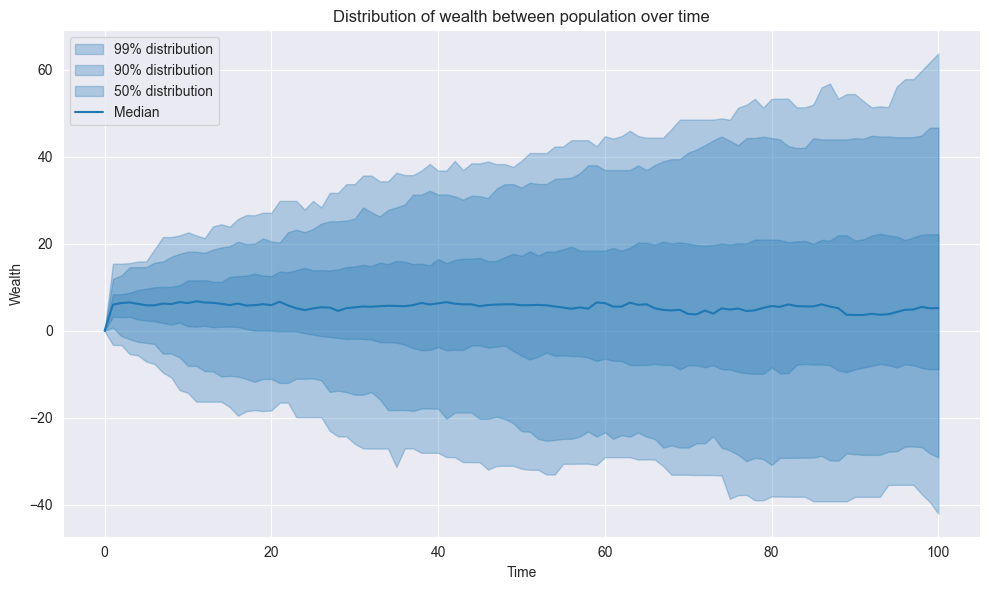

In [84]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Add the bands to the axes
ax.fill_between(x=w_agg.index, y1=w_agg["q1"], y2=w_agg["q99"], alpha=0.3, color="tab:blue")
ax.fill_between(x=w_agg.index, y1=w_agg["q5"], y2=w_agg["q95"], alpha=0.3, color="tab:blue")
ax.fill_between(x=w_agg.index, y1=w_agg["q25"], y2=w_agg["q75"], alpha=0.3, color="tab:blue")

# Plot the median as line
ax.plot(w_agg.index, w_agg["q50"], '-', color="tab:blue")

# Add title, legend and plot
ax.set_title("Distribution of wealth between population over time")
ax.set_xlabel("Time")
ax.set_ylabel("Wealth")
ax.legend([f"{n}% distribution" for n in [99, 90, 50]] + ["Median"], loc="upper left")
fig.tight_layout()
fig.savefig("distribution_timeseries.png")

## Example: Confidence bands
A common application for `~.axes.Axes.fill_between` is the indication of
confidence bands.

`~.axes.Axes.fill_between` uses the colors of the color cycle as the fill
color. These may be a bit strong when applied to fill areas. It is
therefore often a good practice to lighten the color by making the area
semi-transparent using *alpha*.



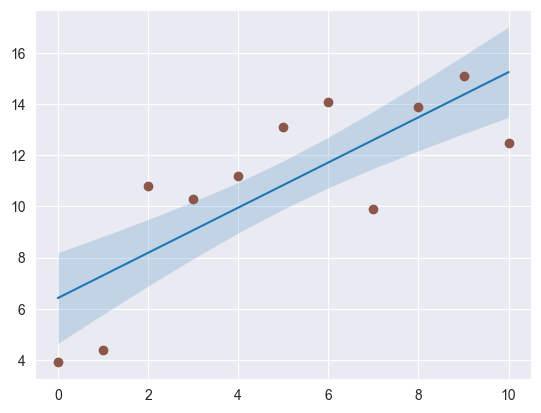

In [4]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')